<a href="https://colab.research.google.com/github/saugata-malakar/Deep-Learning-Projects/blob/main/MNIST_NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


# **Import Libraries and Load Dataset**

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/train.csv.zip')

# **Preprocess Data (Shuffle, Normalize, Split)**

Shuffling: Ensures a random mix of data before splitting.

Normalization: Done by dividing by 255 to convert pixel values from [0, 255] to [0, 1].


In [6]:
# Convert the input data to a NumPy array for efficient numerical operations
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

# Select the first 1000 examples for the development (validation) set
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [7]:
Y_train

array([5, 3, 8, ..., 7, 7, 8])

# **Initialize Neural Network Parameters**

Initializes the weights and biases for a simple 2-layer neural network.
Network architecture:- Input layer: 784 neurons (28x28 pixels for MNIST)    
- Hidden layer: 128 neurons with ReLU activation
- Output layer: 10 neurons (for 10 digit classes 0–9)
- Returns:        W1 (np.ndarray): Weight matrix for layer 1 of shape (128, 784)
  b1 (np.ndarray): Bias vector for layer 1 of shape (128, 1)
  W2 (np.ndarray): Weight matrix for layer 2 of shape (10, 128)
  b2 (np.ndarray): Bias vector for layer 2 of shape (10, 1)

In [8]:
def init_params():
    W1 = np.random.randn(128, 784) * 0.01    #it connects the 784 inputs to 128 hidden neurons.
    b1 = np.zeros((128, 1))                   #Each neuron has one bias value.
    W2 = np.random.randn(10, 128) * 0.01       #it connects the 128 inputs to 10 hidden neurons.
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

# **Activation Functions (ReLU, Softmax)**

**ReLU(z)=max(0,z)**

Outputs zero for negative inputs → leads to sparse activations, making the model more efficient and less prone to overfitting.

Usually used in hidden layers of deep neural networks.

**Softmax**
used in output layer of classification networks—especially when you have more than two classes (MNIST digits 0–9).

In [9]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# **Forward Propagation**

In [10]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1                  #wx+b
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2                 #wx+b
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# **Backward Propagation**

In [11]:
def ReLU_deriv(Z):
    return Z > 0

#Converts label vector Y into a one-hot encoded matrix
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

# **Parameter Update Function**

In [12]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

# **(Accuracy, Prediction)**

In [13]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

#Compute gradients via backpropagation
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
#Update weights and biases using gradients
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 550)

In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# **Add the SGD Optimizer**

(Stochastic Gradient Descent)
Type: First-order optimization algorithm

Update Rule: Uses only current gradient to update weights
Learning Rate: Fixed

Speed of Convergence: Slower, especially with sparse data or noisy gradients
Best For: Simpler problems or when memory usage is critical
Generalization: Often better generalization (avoids overfitting)
Implementation Simplicity: Very simple to implement

Mathematical Update:	**𝜃=𝜃−𝜂⋅∇𝜃𝐽(𝜃)**


In [15]:
# Implementing SGD Optimizer
def sgd_optimizer(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            predictions = get_predictions(A2)
            print(f"SGD Iteration {i}, Accuracy: {get_accuracy(predictions, Y)}")
    return W1, b1, W2, b2

In [16]:
# Train with SGD
print("Training with SGD...")
W1_sgd, b1_sgd, W2_sgd, b2_sgd = sgd_optimizer(X_train, Y_train, 0.1, 550)

Training with SGD...
[0 9 1 ... 7 9 9] [5 3 8 ... 7 7 8]
SGD Iteration 0, Accuracy: 0.09365853658536585
[0 3 9 ... 7 9 1] [5 3 8 ... 7 7 8]
SGD Iteration 10, Accuracy: 0.42517073170731706
[0 3 9 ... 7 7 1] [5 3 8 ... 7 7 8]
SGD Iteration 20, Accuracy: 0.5202682926829268
[0 3 9 ... 7 0 1] [5 3 8 ... 7 7 8]
SGD Iteration 30, Accuracy: 0.5299268292682927
[0 3 9 ... 7 0 1] [5 3 8 ... 7 7 8]
SGD Iteration 40, Accuracy: 0.5267073170731708
[3 3 9 ... 7 7 1] [5 3 8 ... 7 7 8]
SGD Iteration 50, Accuracy: 0.5703170731707317
[3 3 9 ... 7 7 1] [5 3 8 ... 7 7 8]
SGD Iteration 60, Accuracy: 0.6450487804878049
[3 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
SGD Iteration 70, Accuracy: 0.6898048780487804
[3 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
SGD Iteration 80, Accuracy: 0.7164146341463414
[3 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
SGD Iteration 90, Accuracy: 0.7495121951219512
[3 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
SGD Iteration 100, Accuracy: 0.7759512195121951
[3 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
SGD Iteration 110, Accuracy:

# **Add the Adam Optimizer**

(Adaptive Moment Estimation)

Type: First-order optimization with adaptive learning rate and momentum
Update Rule: Uses moving averages of both gradient (momentum) and squared gradient
Learning Rate: Adaptive per-parameter learning rates

Speed of Convergence: Faster convergence in many cases, especially with sparse gradients
Memory Usage: Higher stores additional first and second moment vectors
Best For: Most deep learning applications, including NLP, vision, etc.
Generalization: Can lead to overfitting or poor generalization without regularization

Common Hyperparameters:
- Learning rate (lr)
- β₁ (momentum)
- β₂ (RMS)
- ε (stability)

![](https://example.com/path/to/your/image.png)

In [17]:
def adam_optimizer(X, Y, alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, iterations=550):
    W1, b1, W2, b2 = init_params()

    mW1 = np.zeros_like(W1)
    mb1 = np.zeros_like(b1)
    mW2 = np.zeros_like(W2)
    mb2 = np.zeros_like(b2)

    vW1 = np.zeros_like(W1)
    vb1 = np.zeros_like(b1)
    vW2 = np.zeros_like(W2)
    vb2 = np.zeros_like(b2)

    t = 0

    for i in range(iterations):
        t += 1
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)

        # Momentum update
        mW1 = beta1 * mW1 + (1 - beta1) * dW1
        mb1 = beta1 * mb1 + (1 - beta1) * db1
        mW2 = beta1 * mW2 + (1 - beta1) * dW2
        mb2 = beta1 * mb2 + (1 - beta1) * db2

        # RMSprop update
        vW1 = beta2 * vW1 + (1 - beta2) * (dW1 ** 2)
        vb1 = beta2 * vb1 + (1 - beta2) * (db1 ** 2)
        vW2 = beta2 * vW2 + (1 - beta2) * (dW2 ** 2)
        vb2 = beta2 * vb2 + (1 - beta2) * (db2 ** 2)

        # Bias correction
        mW1_hat = mW1 / (1 - beta1 ** t)
        mb1_hat = mb1 / (1 - beta1 ** t)
        mW2_hat = mW2 / (1 - beta1 ** t)
        mb2_hat = mb2 / (1 - beta1 ** t)

        vW1_hat = vW1 / (1 - beta2 ** t)
        vb1_hat = vb1 / (1 - beta2 ** t)
        vW2_hat = vW2 / (1 - beta2 ** t)
        vb2_hat = vb2 / (1 - beta2 ** t)

        # Parameter update (use assignment to avoid dtype errors)
        W1 = W1 - alpha * mW1_hat / (np.sqrt(vW1_hat) + epsilon)
        b1 = b1 - alpha * mb1_hat / (np.sqrt(vb1_hat) + epsilon)
        W2 = W2 - alpha * mW2_hat / (np.sqrt(vW2_hat) + epsilon)
        b2 = b2 - alpha * mb2_hat / (np.sqrt(vb2_hat) + epsilon)

        if i % 10 == 0:
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            print(f"Adam Iteration {i}, Accuracy: {acc:.4f}")

    return W1, b1, W2, b2

In [18]:
print("Training with Adam...")
W1_adam, b1_adam, W2_adam, b2_adam = adam_optimizer(X_train, Y_train, alpha=0.001, iterations=520)

Training with Adam...
[7 6 1 ... 8 7 7] [5 3 8 ... 7 7 8]
Adam Iteration 0, Accuracy: 0.1005
[8 3 8 ... 7 7 8] [5 3 8 ... 7 7 8]
Adam Iteration 10, Accuracy: 0.6438
[8 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
Adam Iteration 20, Accuracy: 0.7380
[8 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
Adam Iteration 30, Accuracy: 0.8166
[8 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
Adam Iteration 40, Accuracy: 0.8412
[8 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
Adam Iteration 50, Accuracy: 0.8663
[8 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
Adam Iteration 60, Accuracy: 0.8835
[8 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
Adam Iteration 70, Accuracy: 0.8964
[8 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
Adam Iteration 80, Accuracy: 0.9040
[8 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
Adam Iteration 90, Accuracy: 0.9098
[8 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
Adam Iteration 100, Accuracy: 0.9143
[8 3 8 ... 7 7 1] [5 3 8 ... 7 7 8]
Adam Iteration 110, Accuracy: 0.9185
[8 3 8 ... 7 7 8] [5 3 8 ... 7 7 8]
Adam Iteration 120, Accuracy: 0.9220
[8 3 8 ... 7 7 8] [5 3 8 ... 7 7 8]
Adam

# **Test**

Prediction:  [5]
Label:  5


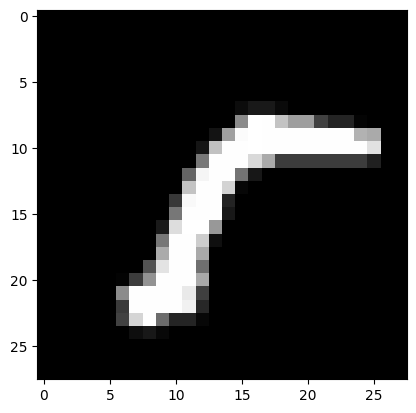

Prediction:  [3]
Label:  3


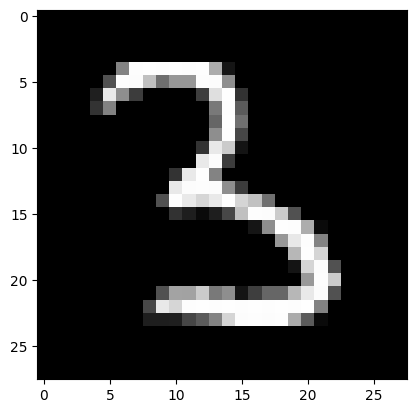

Prediction:  [0]
Label:  0


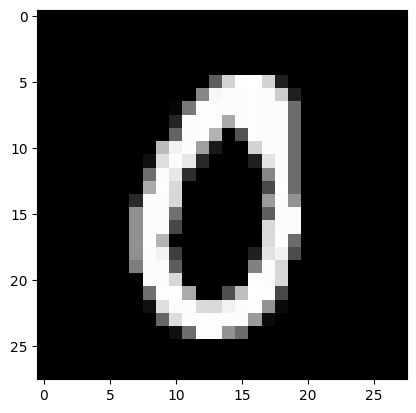

Prediction:  [2]
Label:  3


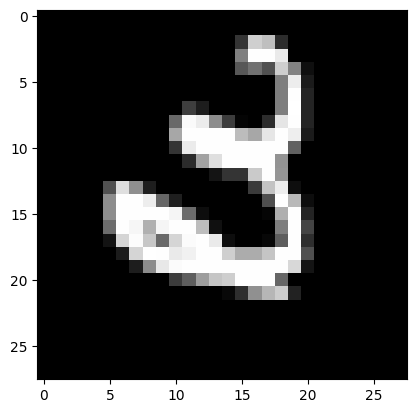

In [21]:
test_prediction(0, W1_adam, b1_adam, W2_adam, b2_adam) # Use weights from adam_optimizer
test_prediction(1, W1_adam, b1_adam, W2_adam, b2_adam)
test_prediction(4, W1_adam, b1_adam, W2_adam, b2_adam)
test_prediction(3, W1_adam, b1_adam, W2_adam, b2_adam)